In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Galan\AppData\Local\Temp\ipykernel_6832\2250977813.py:1: SyntaxWarning: invalid escape sequence '\G'
  img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary


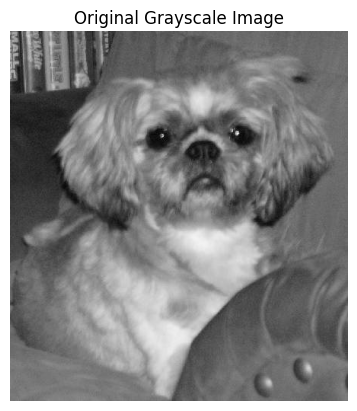

In [2]:
img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [3]:
# Create a function to display images
def show_image(image, title="Image"):
	plt.imshow(image, cmap='gray')
	plt.title(title)
	plt.axis('off')
	plt.show()

## Point Operations

Point operations adalah teknik dasar dalam pengolahan citra digital yang melibatkan manipulasi nilai intensitas piksel secara individual tanpa mempertimbangkan piksel tetangga. Operasi ini sering digunakan untuk meningkatkan kualitas citra, menyesuaikan kecerahan dan kontras, serta menerapkan efek khusus. Berikut adalah beberapa operasi titik umum yang sering digunakan dalam pengolahan citra:
1. Brightness Adjustment
2. Contrast Adjustment
3. Negative / Inversion
4. Thresholding
5. Gamma Correction

### 1. Brightness Adjustment
**Konsep:**
Brightness adjustment adalah operasi point yang menambahkan atau mengurangi nilai konstanta pada setiap piksel dalam citra. Operasi ini menggeser histogram ke kanan (lebih terang) atau ke kiri (lebih gelap) tanpa mengubah bentuk distribusinya.

**Implementasi:**
```python
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
```

**Parameter:**
- `alpha=1.0`: Faktor skala tetap (tidak mengubah kontras)
- `beta=50`: Menambahkan 50 pada setiap nilai piksel (mencerahkan)
- `beta=-50`: Mengurangi 50 dari setiap nilai piksel (menggelapkan)

**Formula Matematis:**
```
Output = Input + beta
Brightened = I(x,y) + 50
Darkened = I(x,y) - 50
```

**Catatan:** Fungsi `convertScaleAbs()` secara otomatis memastikan nilai tetap dalam rentang [0, 255] dengan clipping.

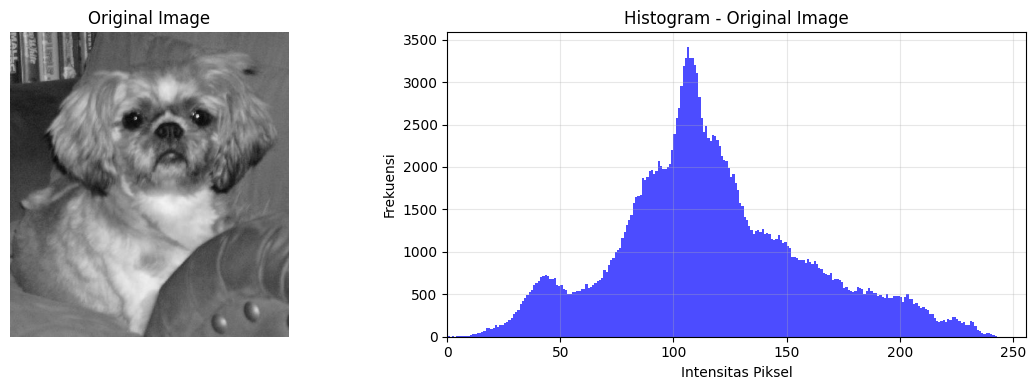

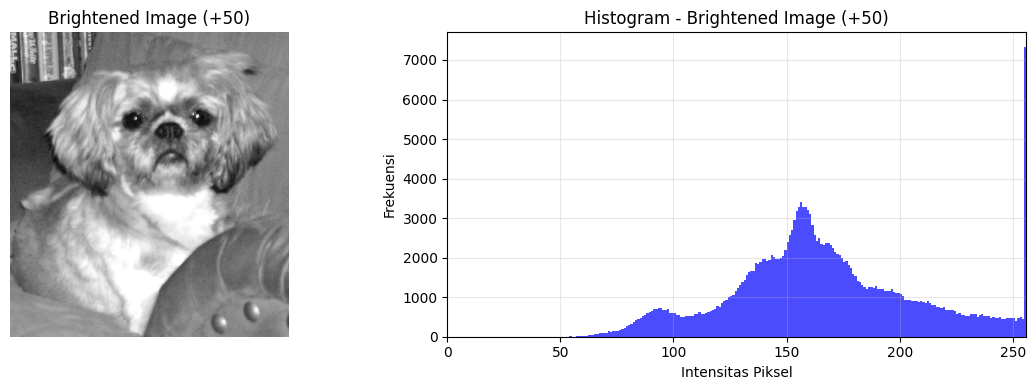

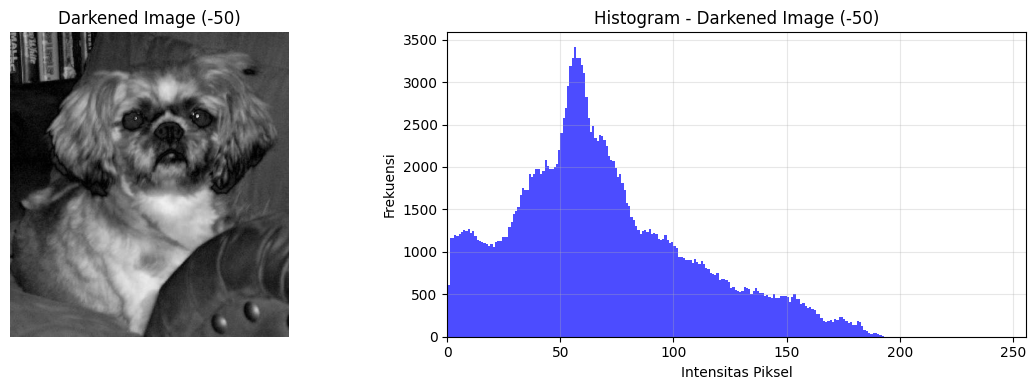

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_histogram(img, title):
    """Menampilkan gambar beserta histogramnya"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Tampilkan gambar
    ax1.imshow(img, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')
    
    # Tampilkan histogram
    ax2.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    ax2.set_title(f'Histogram - {title}')
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Contoh penggunaan
# Asumsikan img_gray sudah ada
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)

# Tampilkan gambar asli dengan histogram
show_image_with_histogram(img_gray, "Original Image")

# Tampilkan gambar brightened dengan histogram
show_image_with_histogram(bright, "Brightened Image (+50)")

# Tampilkan gambar darkened dengan histogram
show_image_with_histogram(dark, "Darkened Image (-50)")

# Analisis Histogram pada Brightness Adjustment

## Pendahuluan
Ketika kita mengubah kecerahan gambar dengan menambah atau mengurangi nilai konstan, perubahan yang terjadi bisa dilihat dengan jelas melalui histogram. Histogram ini pada dasarnya menunjukkan seberapa banyak piksel dengan intensitas tertentu dalam gambar.

## Hasil Pengamatan pada Gambar Original

Dari histogram gambar original, bisa dilihat bagaimana distribusi intensitas pikselnya. Biasanya gambar yang bagus punya sebaran yang cukup merata, tidak terlalu menumpuk di satu area saja. Kalau histogramnya terlalu ke kiri, berarti gambarnya cenderung gelap. Kalau terlalu ke kanan, berarti terlalu terang.

## Yang Terjadi pada Brightened Image (+50)

Pas gambar ditambah 50 unit brightness, yang terjadi cukup menarik:

**Pergeseran histogram ke kanan**  
Seluruh histogram bergeser 50 unit ke kanan. Ini masuk akal karena semua piksel ditambah 50. Misalnya piksel yang tadinya punya nilai 100 jadi 150, yang 150 jadi 200, dan seterusnya.

**Masalah clipping**  
Nah, ini yang jadi masalah. Piksel yang nilai originalnya di atas 205 akan "mentok" di 255 (putih maksimal). Jadi kalau original-nya 210, harusnya jadi 260 tapi karena maksimalnya cuma 255, ya jadi 255. Begitu juga yang 220, 230, 240 - semuanya jadi 255. Akibatnya detail di area terang hilang dan jadi flat putih.

Di histogram, ini keliatan dari "spike" atau lonjakan di ujung kanan (nilai 255). Semakin banyak piksel yang ter-clipping, semakin tinggi spike-nya.

**Dampak ke gambar**  
- Area gelap jadi lebih keliatan detailnya
- Tapi area yang udah terang malah jadi overexposed dan kehilangan detail
- Gambar keseluruhan memang lebih terang, tapi ada trade-off berupa kehilangan informasi di highlight

## Yang Terjadi pada Darkened Image (-50)

Sebaliknya, pas dikurangi 50:

**Pergeseran histogram ke kiri**  
Histogram bergeser 50 unit ke kiri. Piksel yang tadinya 100 jadi 50, yang 150 jadi 100, dan seterusnya.

**Clipping di sisi gelap**  
Masalah yang sama terjadi, tapi di sisi sebaliknya. Piksel dengan nilai di bawah 50 akan "mentok" di 0 (hitam). Piksel yang originalnya 30, 20, 10 - semuanya jadi 0 (hitam pekat). Detail di area gelap (shadow) jadi hilang.

Spike di histogram muncul di ujung kiri (nilai 0), menandakan banyak piksel yang ter-clipping ke hitam.

**Dampak ke gambar**  
- Area terang masih oke, detailnya tetap terjaga
- Tapi shadow jadi "crushed" - semua jadi hitam pekat tanpa detail
- Gambar jadi underexposed di area gelap

## Perbandingan

Kalau kita lihat ketiga histogram bersamaan, pola yang muncul cukup jelas:

1. Bentuk dasar histogramnya sama, cuma posisinya aja yang beda
2. Lebar distribusinya tetap sama, artinya kontras relatif masih sama (kecuali di area yang ter-clipping)
3. Darkened paling kiri, original di tengah, brightened paling kanan

Yang penting untuk diperhatikan adalah **area clipping**. Kalau spike di ujung histogram terlalu tinggi, berarti banyak detail yang hilang.


## Kesimpulan

Brightness adjustment dengan konstanta memang gampang, tapi punya keterbatasan besar. Metode ini "buta" - tidak peduli apakah suatu area sudah terang atau masih gelap, semua diperlakukan sama. Akibatnya sering terjadi clipping yang menghilangkan detail.

Untuk koreksi sederhana dengan perubahan kecil (sekitar ±20-30), metode ini masih oke. Tapi kalau mau hasil yang lebih baik, terutama untuk gambar dengan dynamic range tinggi, lebih baik pakai metode yang lebih adaptif.

Yang paling penting: selalu perhatikan histogram. Histogram tidak bohong - dia menunjukkan dengan jelas apa yang terjadi pada gambar kita. Kalau lihat spike di ujung histogram, itu warning sign bahwa ada detail yang hilang.

### 2. Contrast Adjustment
**Konsep:**
Contrast adjustment mengubah rentang intensitas piksel dengan mengalikan nilai piksel dengan faktor skala (alpha). Nilai kontras yang tinggi memperbesar perbedaan antara area terang dan gelap, sedangkan nilai yang rendah mengurangi perbedaan tersebut.

**Implementasi:**
```python
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
```

**Parameter:**
- **Low Contrast**: `alpha=0.5, beta=128`
  - Mengurangi rentang intensitas menjadi setengahnya
  - Beta=128 untuk mempertahankan nilai tengah agar tidak terlalu gelap
  
- **Normal Contrast**: `alpha=1.0, beta=0`
  - Mempertahankan citra asli tanpa perubahan
  
- **High Contrast**: `alpha=1.5, beta=0`
  - Memperluas rentang intensitas 1.5x lipat
  - Memperjelas detail dan tepi objek

**Formula Matematis:**
```
Output = alpha × Input + beta
Low: I'(x,y) = 0.5 × I(x,y) + 128
High: I'(x,y) = 1.5 × I(x,y)
```

**Efek pada Histogram:**
- Low contrast: Histogram menyempit dan terpusat
- High contrast: Histogram melebar ke arah ekstrem (0 dan 255)

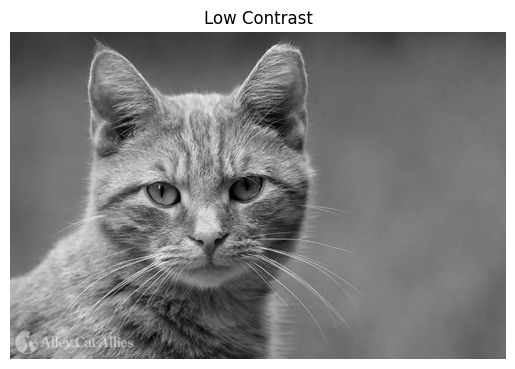

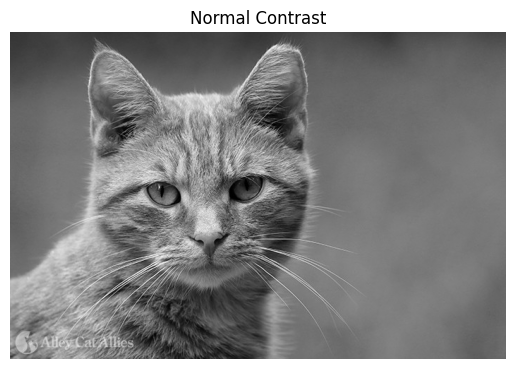

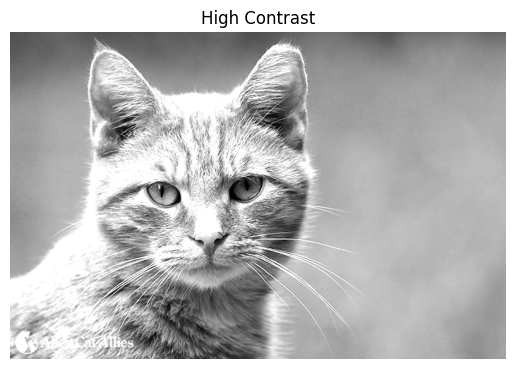

In [ ]:
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
show_image(low_contrast, "Low Contrast")
show_image(normal_contrast, "Normal Contrast")
show_image(high_contrast, "High Contrast")


### 3. Negative / Inversion

**Konsep:**
Image inversion menciptakan efek negatif fotografis dengan membalik nilai intensitas setiap piksel. Piksel gelap menjadi terang dan sebaliknya. Operasi ini berguna untuk analisis medis (X-ray) atau efek artistik.

**Implementasi:**
```python
negative = 255 - img_gray
```

**Formula Matematis:**
```
Output = MAX_VALUE - Input
I'(x,y) = 255 - I(x,y)
```

**Contoh Transformasi:**
- Piksel dengan nilai 0 (hitam) → 255 (putih)
- Piksel dengan nilai 255 (putih) → 0 (hitam)
- Piksel dengan nilai 128 (abu-abu) → 127 (abu-abu)

**Karakteristik:**
- Operasi sederhana dan cepat (hanya subtraksi)
- Tidak mengubah informasi struktural citra
- Histogram terbalik (mirror) terhadap nilai tengah (127.5)

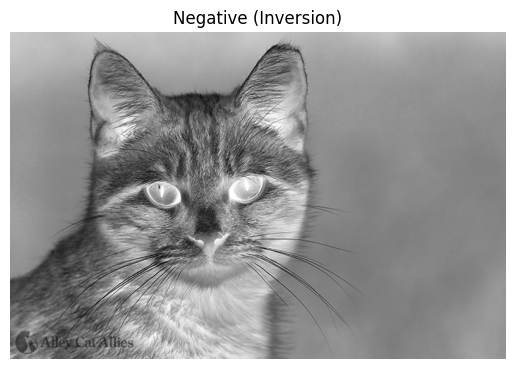

In [ ]:
negative = 255 - img_gray
show_image(negative, "Negative (Inversion)")

### 4. Thresholding
**Konsep:**
Thresholding mengubah citra grayscale menjadi citra biner (hitam-putih) berdasarkan nilai ambang (threshold). Piksel dengan intensitas di atas threshold menjadi putih (255), dan di bawahnya menjadi hitam (0).

**Implementasi:**
```python
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
```

**Parameter:**
- `img_gray`: Citra grayscale input
- `128`: Nilai threshold (ambang batas)
- `255`: Nilai maksimum untuk piksel di atas threshold
- `cv2.THRESH_BINARY`: Jenis thresholding biner

**Formula Matematis:**
```
I'(x,y) = { 255  if I(x,y) > 128
          { 0    if I(x,y) ≤ 128
```

**Kegunaan:**
- Segmentasi objek dari latar belakang
- Deteksi tepi dan kontur
- Preprocessing untuk OCR (Optical Character Recognition)
- Analisis citra biner

**Return Value:**
- Nilai pertama (`_`): Threshold value yang digunakan (diabaikan dalam kasus ini)
- `binary`: Citra biner hasil thresholding

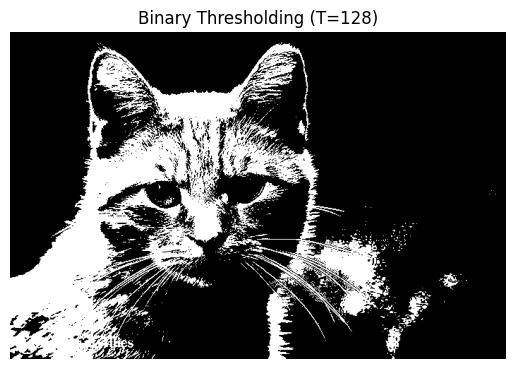

In [ ]:
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
show_image(binary, "Binary Thresholding (T=128)")

### 5. Gamma Correction

**Konsep:**
Gamma correction adalah transformasi non-linear yang menyesuaikan kecerahan citra dengan mempertimbangkan persepsi visual manusia. Berbeda dengan brightness adjustment linear, gamma correction mempengaruhi mid-tones lebih signifikan daripada nilai ekstrem.

**Implementasi:**
```python
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens
```

**Formula Matematis:**
```
Output = 255 × (Input/255)^(1/gamma)
```

**Parameter Gamma:**
- **gamma > 1** (misalnya 2.2): Menggelapkan citra
  - Mid-tones menjadi lebih gelap
  - Meningkatkan kontras pada area terang
  
- **gamma < 1** (misalnya 0.5): Mencerahkan citra
  - Mid-tones menjadi lebih terang
  - Meningkatkan detail pada area gelap
  
- **gamma = 1**: Tidak ada perubahan (linear)

**Teknik Lookup Table (LUT):**
- Membuat tabel 256 nilai yang sudah terkoreksi gamma
- Fungsi `cv2.LUT()` memetakan setiap piksel ke nilai baru menggunakan tabel
- Efisien untuk operasi real-time karena hanya melakukan lookup, bukan kalkulasi

**Kegunaan:**
- Koreksi tampilan citra untuk berbagai perangkat (monitor, printer)
- Meningkatkan visibilitas detail pada area gelap atau terang
- Preprocessing untuk computer vision dan machine learning
- Simulasi kondisi pencahayaan berbeda

**Perbedaan dengan Brightness Adjustment:**
- Brightness: Transformasi linear (menambah/kurangi konstanta)
- Gamma: Transformasi non-linear (mengubah distribusi intensitas secara proporsional)

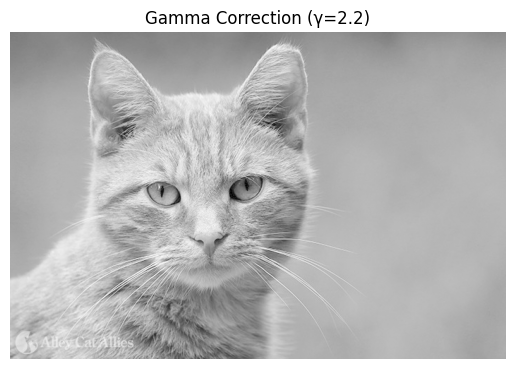

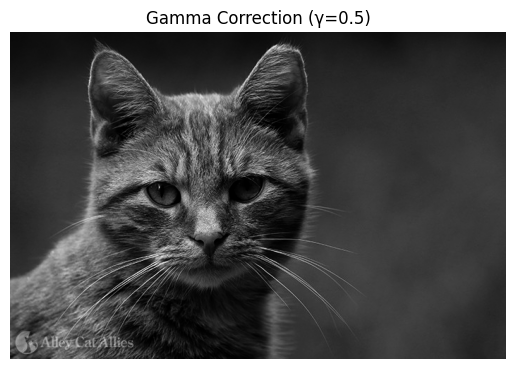

In [ ]:
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens

show_image(gamma_dark, "Gamma Correction (γ=2.2)")
show_image(gamma_light, "Gamma Correction (γ=0.5)")